## **Блок №1. Базовый уровень**

### **1. Константы**

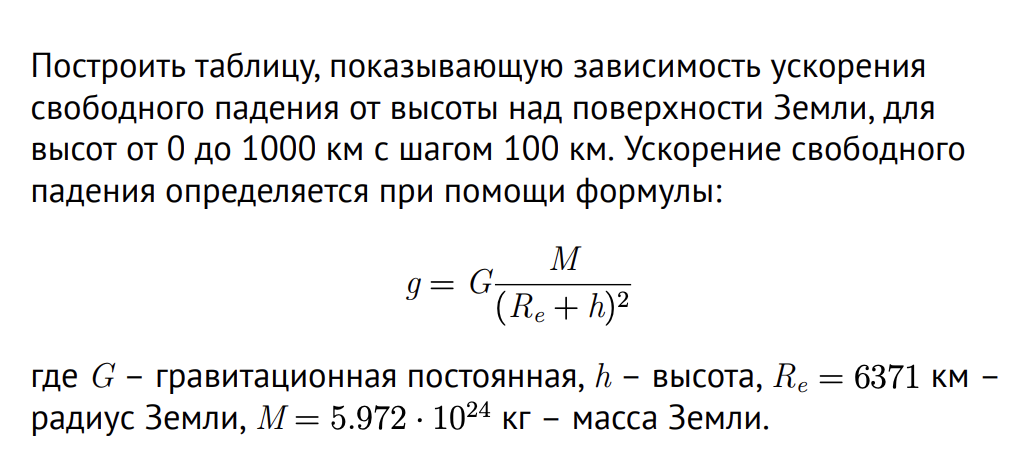

In [ ]:
from scipy import constants
import numpy as np


def calculate_g(h):
  M = 5.972 * (10**24)
  R = 6371
  g = constants.G * (M/(((R+h)*1000)**2))
  return g

print('\tВысота (км)\tУскорение свободного падения (м.с^2)')
hs = np.arange(0,1001,100)
for i in range(len(hs)):
  a = calculate_g(hs[i])
  print(f'{i}\t\t{hs[i]:4.0f}\t\t\t\t{a:1.6f}')

	Высота (км)	Ускорение свободного падения (м.с^2)
0		   0				9.819973
1		 100				9.518811
2		 200				9.231294
3		 300				8.956610
4		 400				8.694005
5		 500				8.442783
6		 600				8.202294
7		 700				7.971937
8		 800				7.751149
9		 900				7.539408
10		1000				7.336226


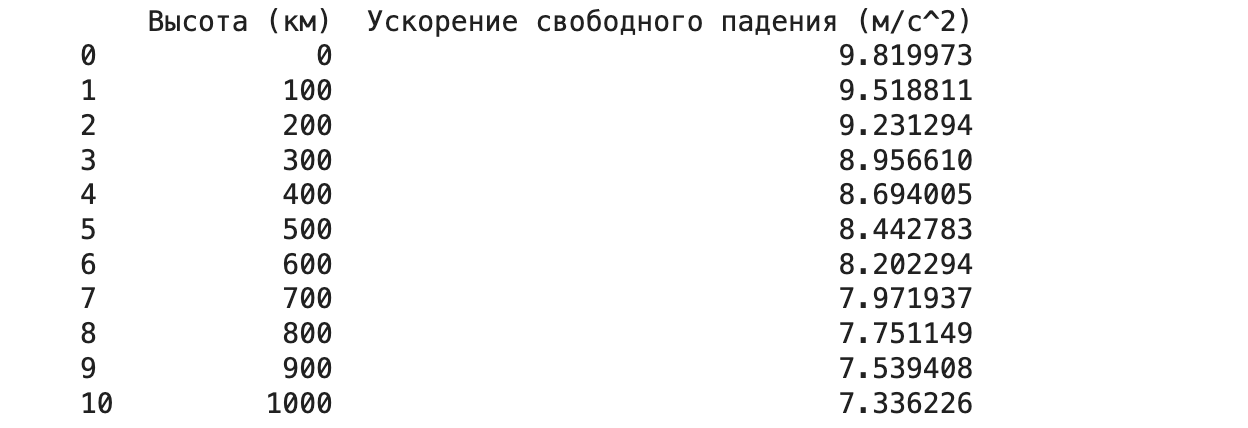

### **2. Линейная алгебра**

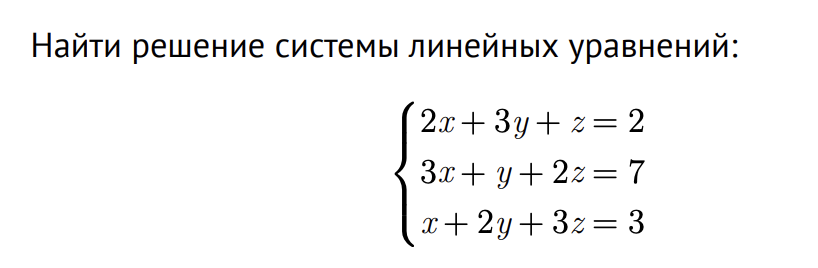

In [ ]:
from scipy.linalg import solve
a = np.array(
    [
        [2,3,1],
        [3,1,2],
        [1,2,3]
    ]
)
b = np.array([2,7,3])

print(solve(a,b))

[ 2. -1.  1.]


### **3. Интегрирование**

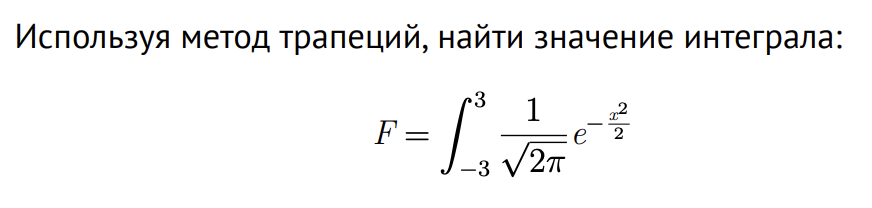

In [ ]:
from scipy import integrate, constants
import numpy as np

def targer_func(x):
  return (np.exp(-x**2/2)) / (np.sqrt(2*constants.pi))

x = np.linspace(-3,3, num=500)
y = targer_func(x)

trapz_result = integrate.trapz(y, x)

print(trapz_result)

0.9972998835680744


### **4. Методы оптимизации. Поиск корней уравнения**

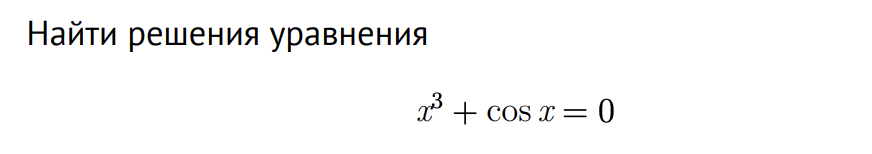

**Сделайте это разными способами, постройте график функции**

[-0.8654740331016144, -0.8654740331021458, -0.8654740331016111]


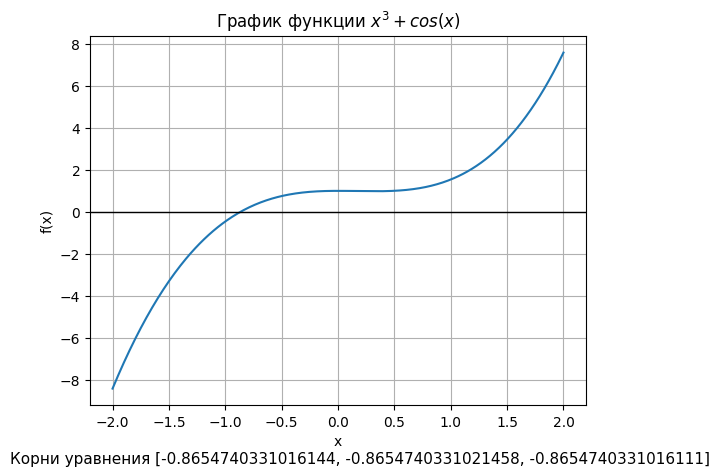

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, bisect, root_scalar


def equation(x):
    return x**3 + np.cos(x)

x_values = np.linspace(-2, 2, 400)
y_values = equation(x_values)


results = [root(equation, -2, method='hybr').x[0]]
results.append(bisect(equation, a=-2, b=2))
results.append(root_scalar(equation, x0=-2, x1=2).root)
print(results)



plt.plot(x_values, y_values)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции $x^3 + cos(x)$')
plt.grid(True)
plt.figtext(x=0, y=-0.01, s=f'Корни уравнения {results}', fontsize=11)
plt.show()

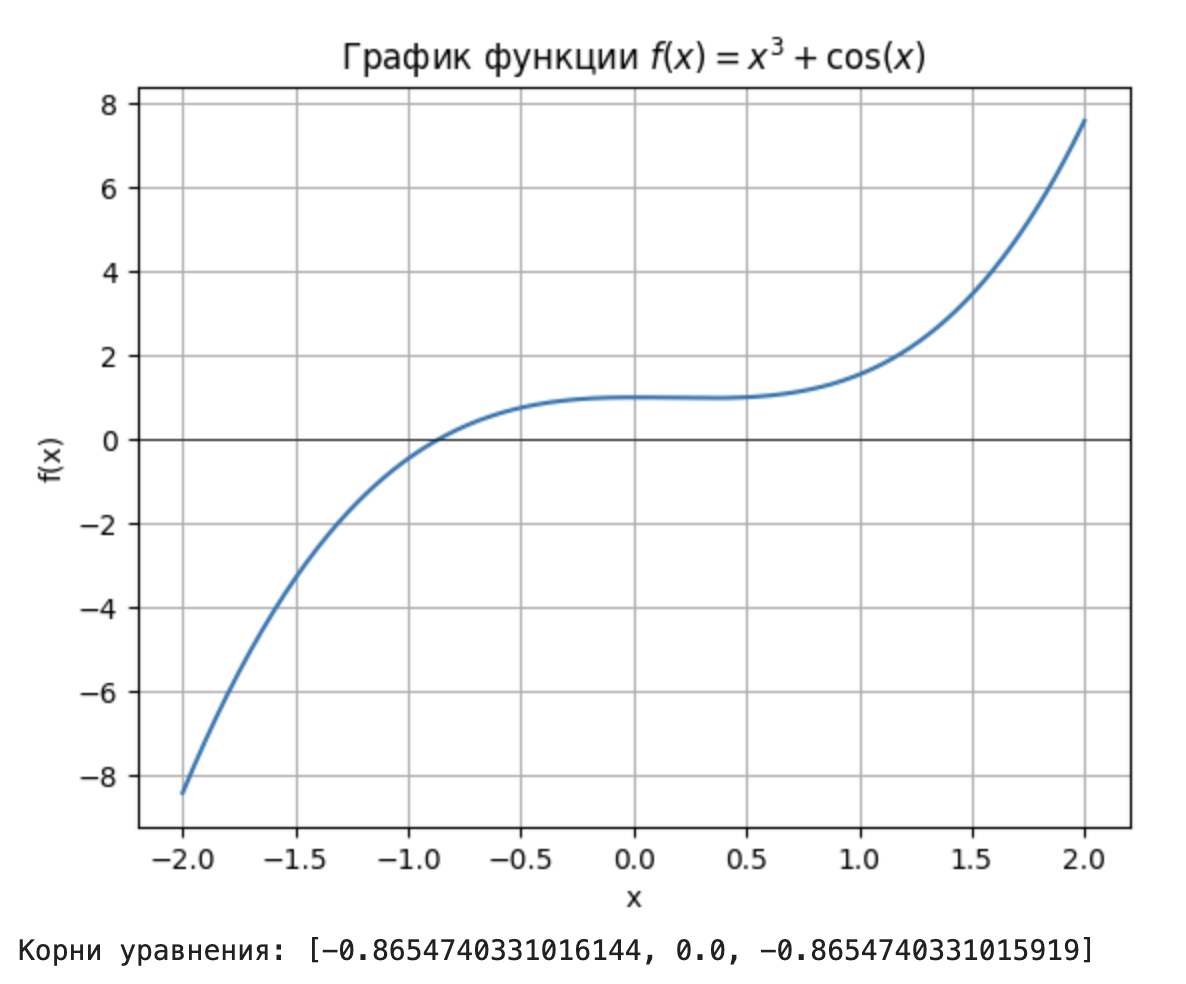

### **5. Методы оптимизации. Поиск минимума**

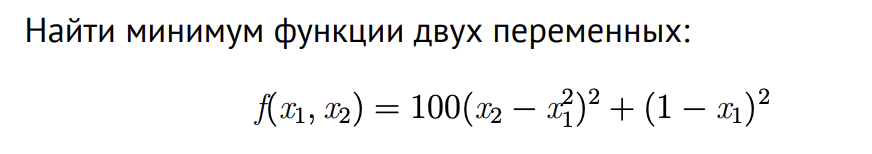

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Определяем функцию
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Начальное приближение
x0 = np.array([0, 2])

# Минимизируем функцию
res = minimize(f, x0, method='Nelder-Mead')

# Выводим результат
print("x1 =", res.x[0])
print("x2 =", res.x[1])
print("f(x1, x2) =", res.fun)

x1 = 1.0000187227672097
x2 = 1.0000376720359792
f(x1, x2) = 3.5565644026927867e-10


## **Блок №2. Повышенный уровень**

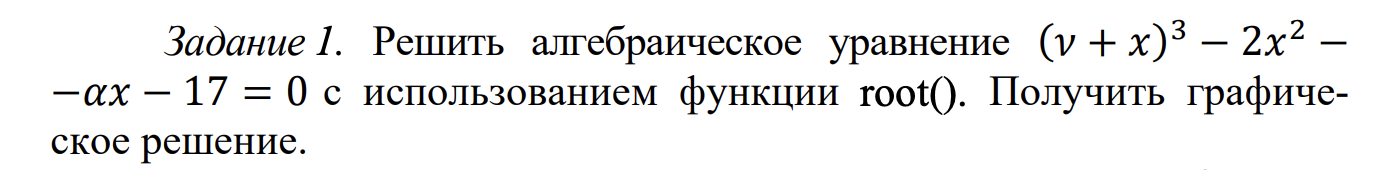

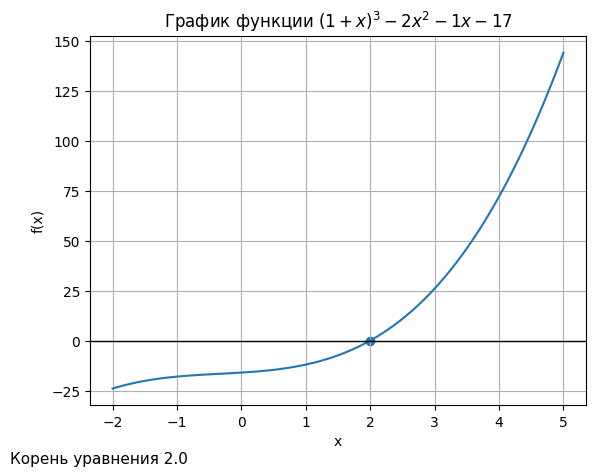

In [ ]:
def ex1_func(x, v=1, a=1):
  return (v + x)**3 - 2*(x**2) - a*x - 17

x_values = np.linspace(-2, 5, 400)
y_values = ex1_func(x_values)
result = root(ex1_func, -2, method='hybr').x[0]


plt.plot(x_values, y_values)
plt.axhline(0, color='black', linewidth=1)
plt.scatter(result, 0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции $(1+x)^3-2x^2-1x-17$')
plt.grid(True)
plt.figtext(x=0, y=-0.01, s=f'Корень уравнения {result}', fontsize=11)
plt.show()

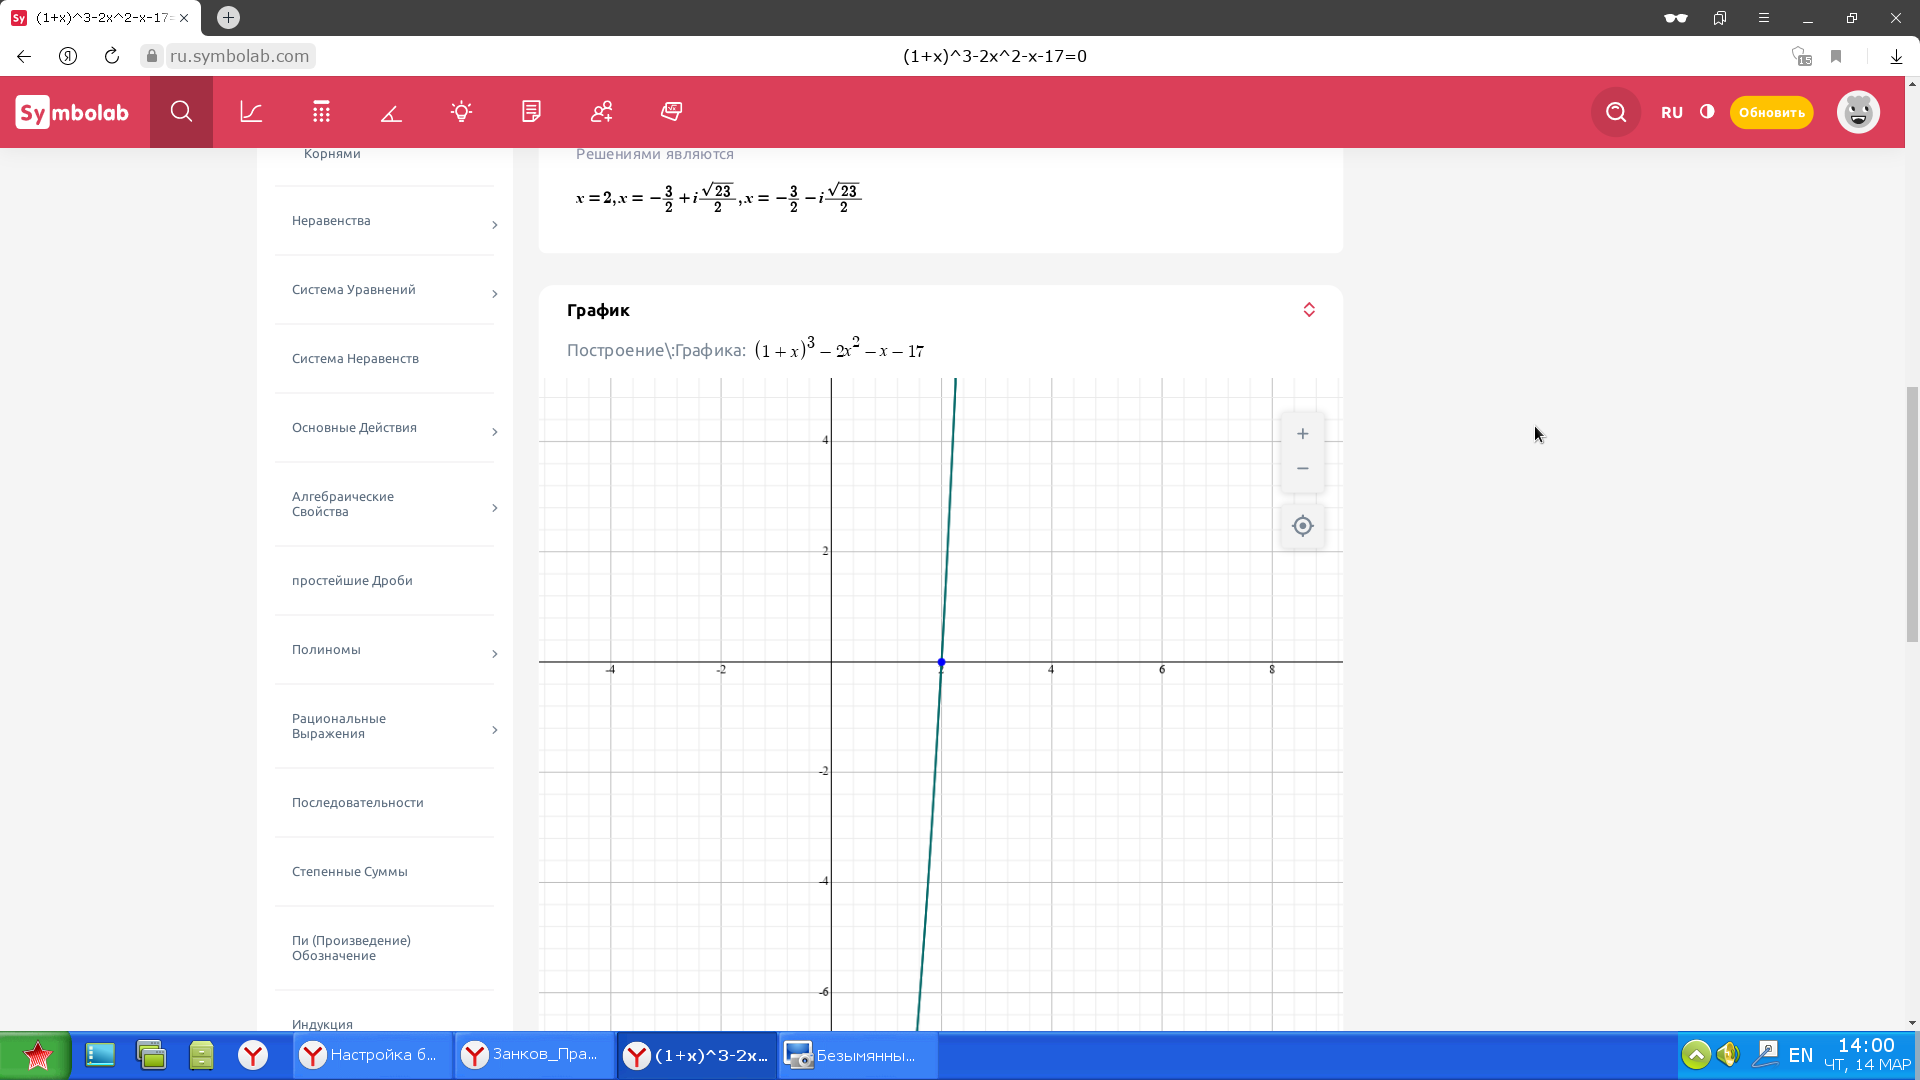

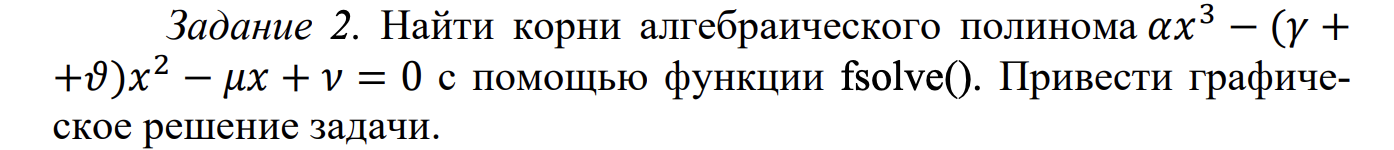

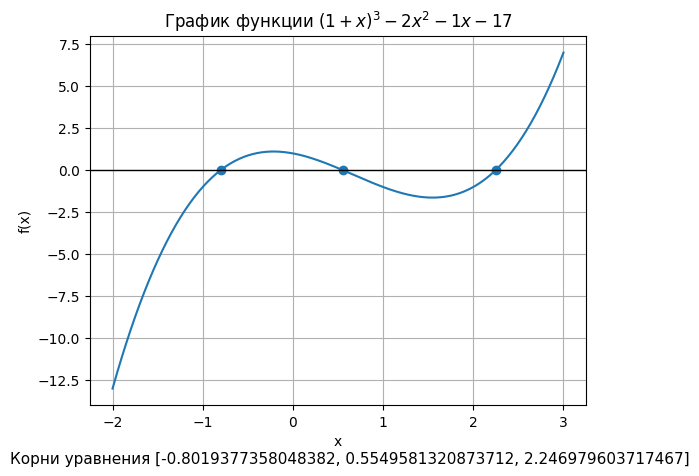

In [ ]:
from scipy.optimize import fsolve
from scipy.signal import argrelextrema

def ex2_func(x, a=1, gamma=1, vi=1, mu=1, v=1):
    return a*(x**3) - (gamma+vi)*(x**2) - mu*x + v

x_values = np.linspace(-2, 3, 400)
y_values = ex2_func(x_values)

x0 = [-2, 0, 2]

roots = []

for i in x0:
  root = fsolve(ex2_func, i)[0]
  roots.append(root)



plt.plot(x_values, y_values)
plt.axhline(0, color='black', linewidth=1)
plt.scatter(roots, [0]*len(roots))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции $(1+x)^3-2x^2-1x-17$')
plt.grid(True)
plt.figtext(x=0, y=-0.01, s=f'Корни уравнения {roots}', fontsize=11)
plt.show()

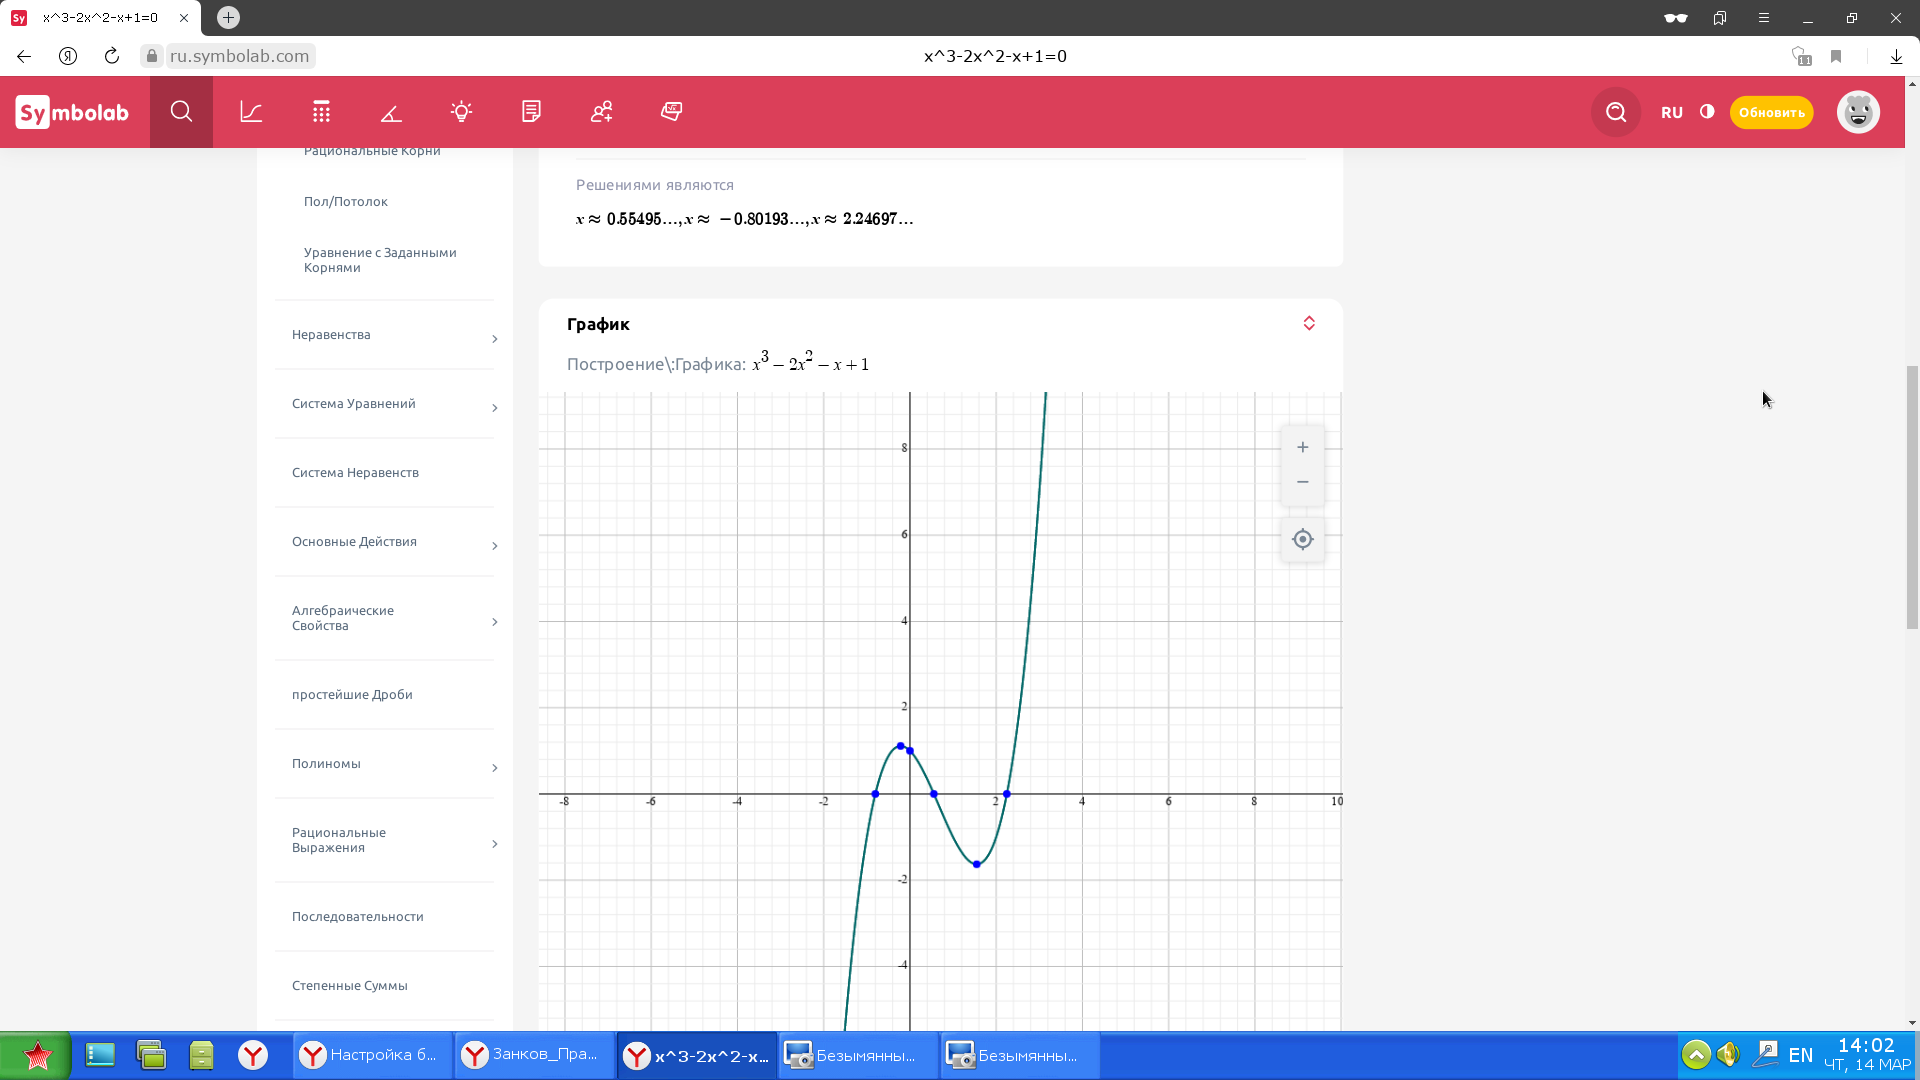

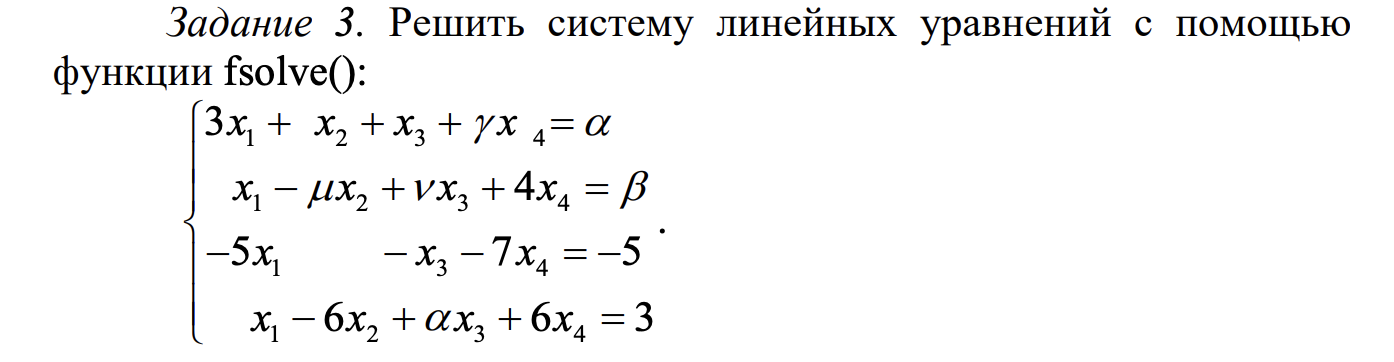

In [ ]:
def ex3_func(x, gamma=1, mu=1, v=1, alpha=1, betta=1):
  a = np.array(
    [
        [3, 1, 1, gamma],
        [1, -mu, v, 4],
        [-5, 0, -1, -7],
        [1, -6, alpha, 6]
    ]
  )
  b = np.array([alpha, betta, -5, 3])
  return np.dot(a, x) - b

x = fsolve(ex3_func, np.zeros(4))

print("Решение системы линейных уравнений:")
print(x)

Решение системы линейных уравнений:
[ 0.79487179 -0.25641026 -1.48717949  0.35897436]


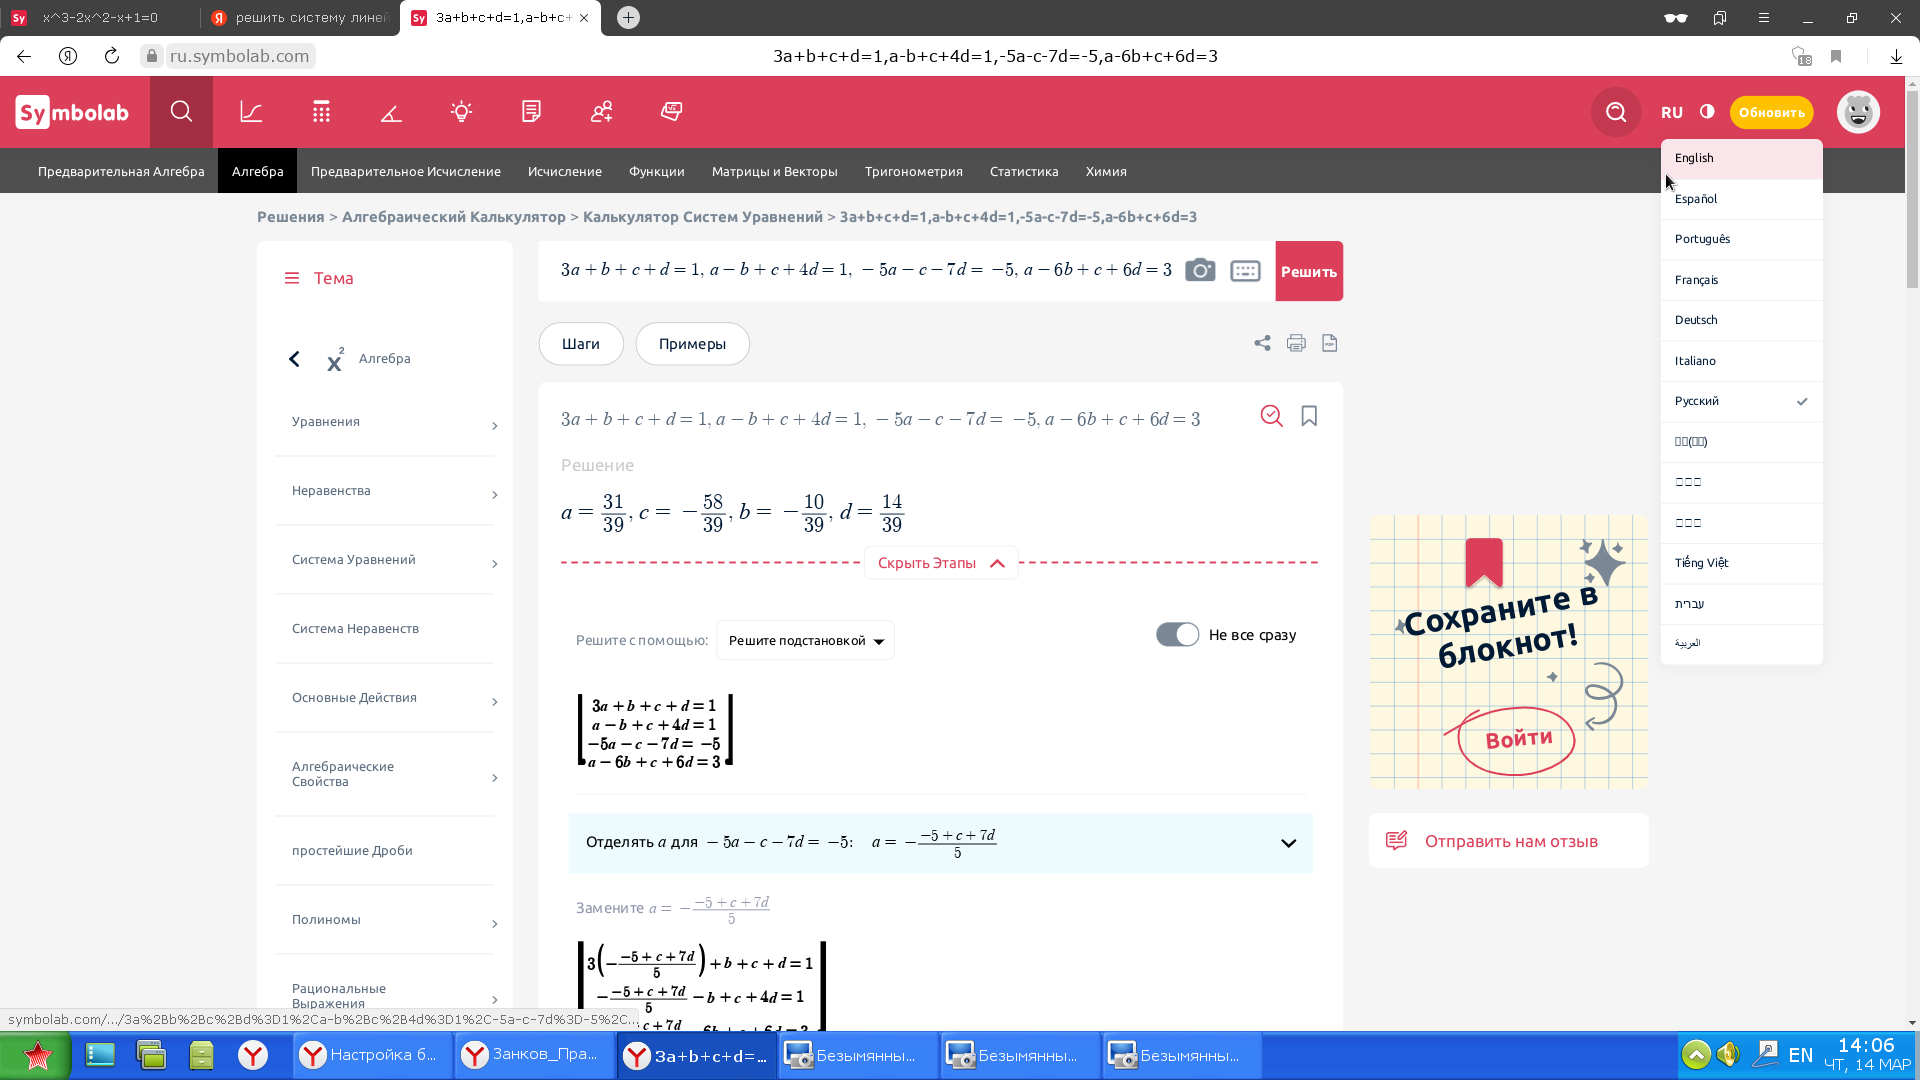

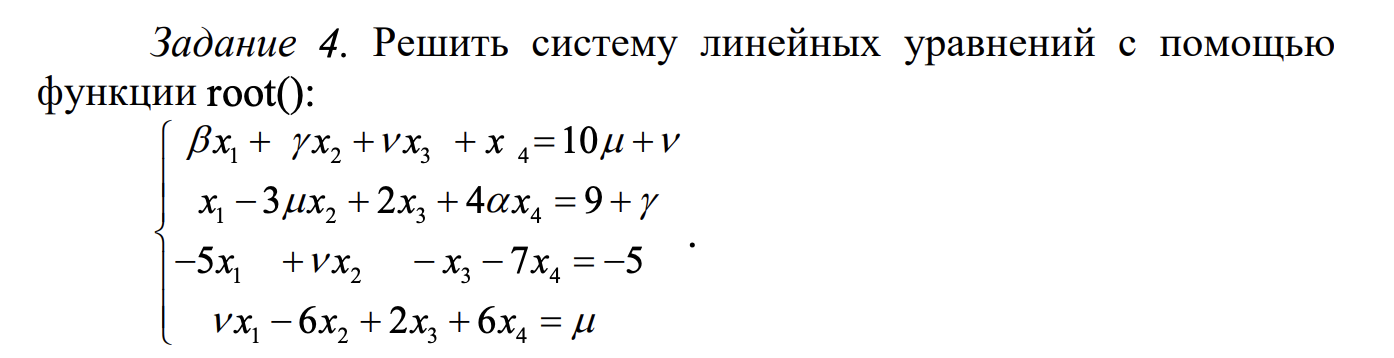

In [ ]:
import numpy as np
from scipy.optimize import root


def ex4_func(x, betta=1, gamma=1, v=1, mu=1, alpha=1):
  a = np.array(
    [
        [betta, gamma, v, 1],
        [1, -3*mu, 2, 4*alpha],
        [-5, v, -1, -7],
        [v, -6, 2, 6]
    ]
  )
  b = np.array([10*mu+v, 9+gamma, -5, mu])
  return np.dot(a, x) - b

x = root(ex4_func, np.zeros(4)).x

print("Решение системы линейных уравнений:")
print(x)

Решение системы линейных уравнений:
[ 21.  -9.  17. -18.]


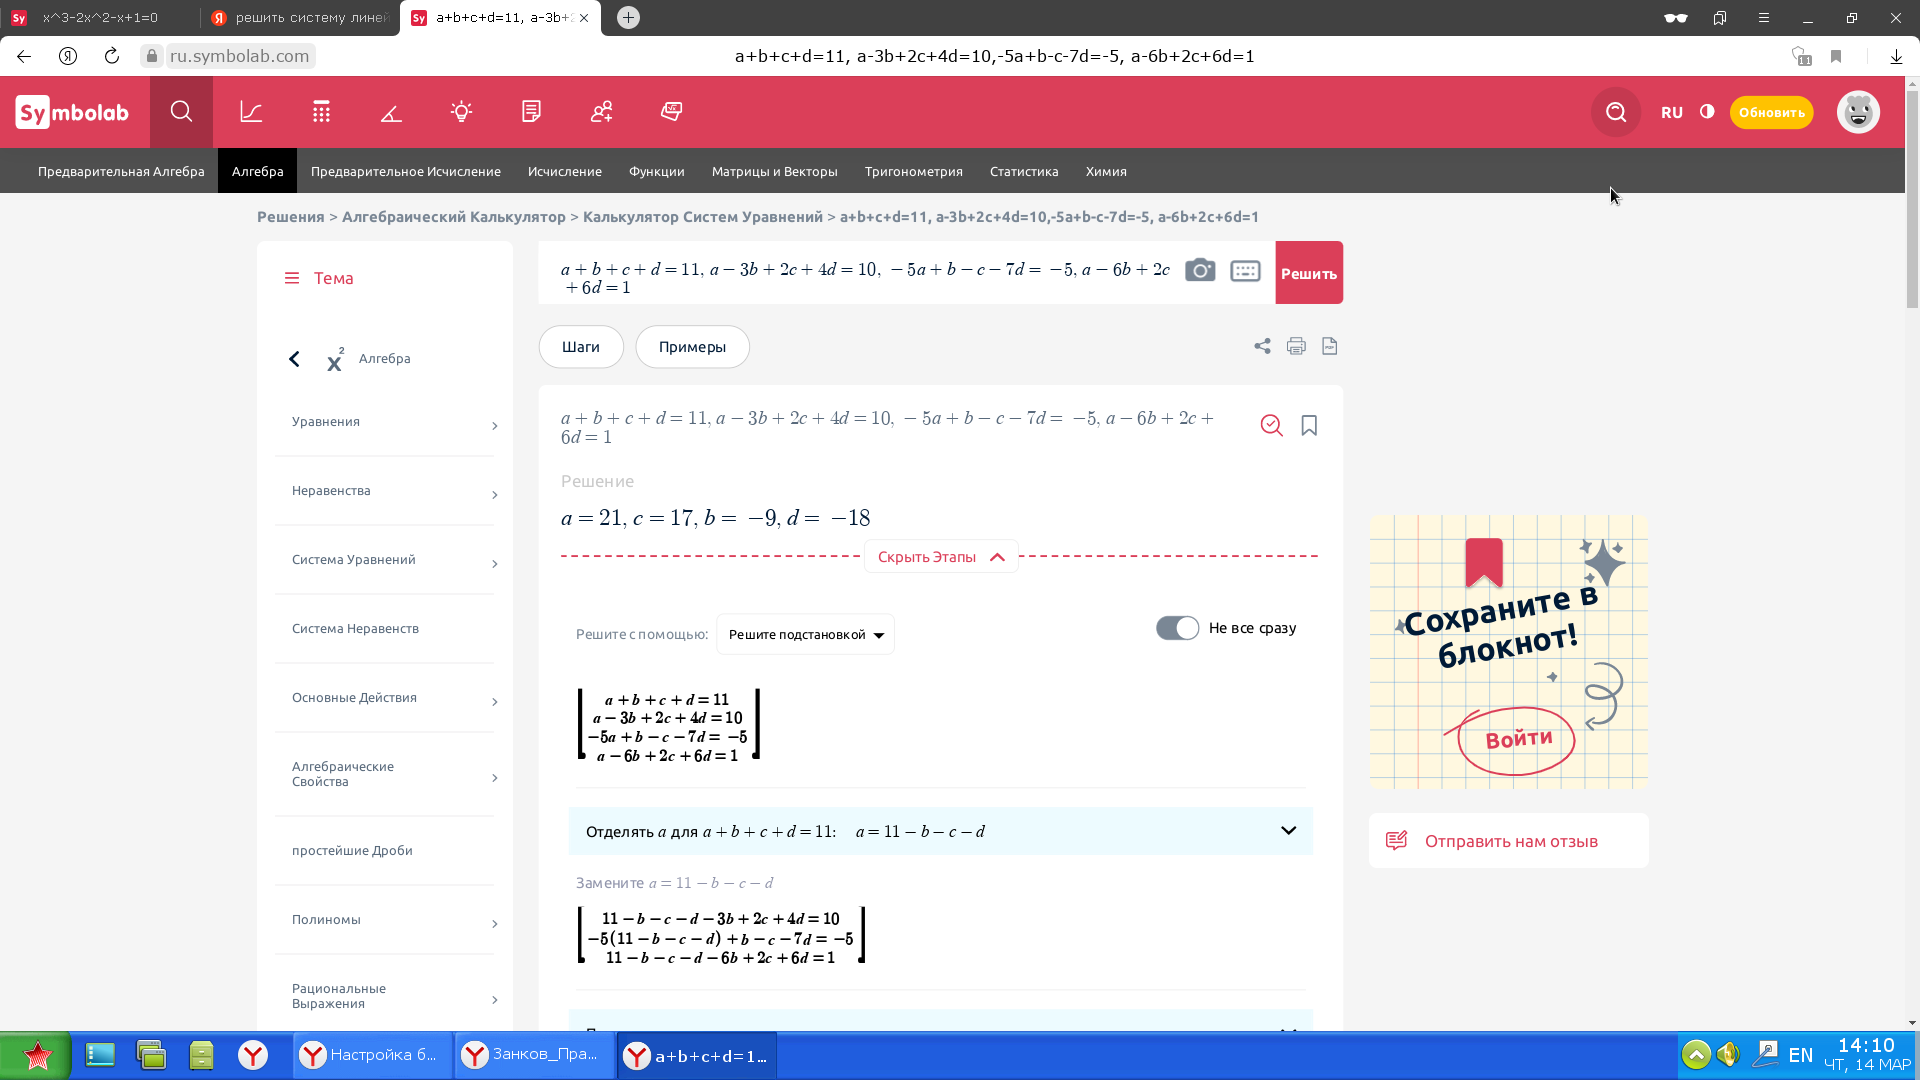

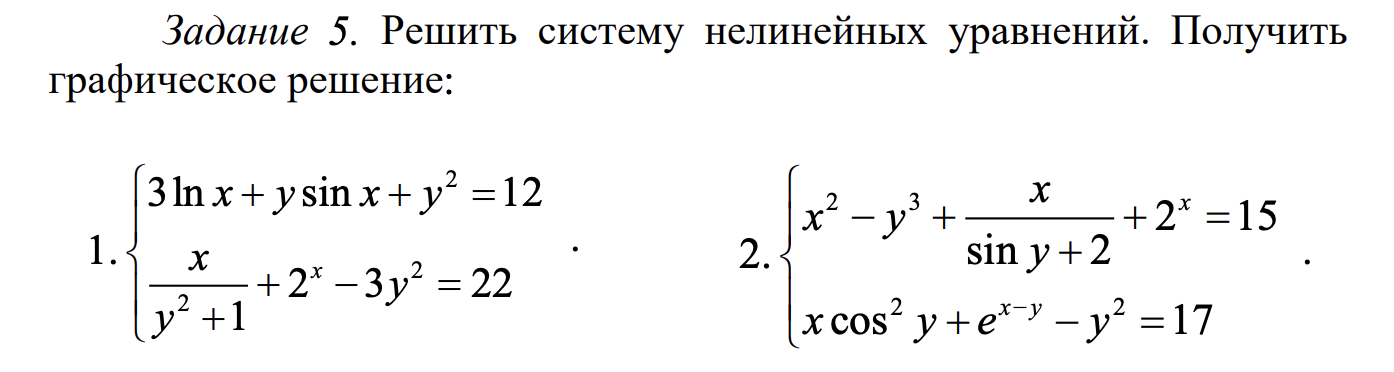

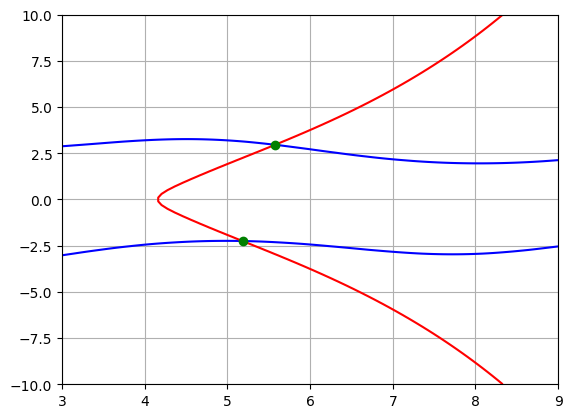

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def system_equations(variables):
    x, y = variables
    eq1 = 3*np.log(x) + y*np.sin(x) + y**2 - 12
    eq2 = x/(y**2 + 1) + 2**x - 3*(y**2) - 22
    return [eq1, eq2]

initial_guess1 = [3, -10]
solution1 = fsolve(system_equations, initial_guess1)

initial_guess2 = [9, 10]
solution2 = fsolve(system_equations, initial_guess2)

x = np.linspace(3, 9, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z1 = 3*np.log(X) + Y*np.sin(X) + Y**2 - 12
Z2 = X/(Y**2 + 1) + 2**X - 3*(Y**2) - 22

plt.contour(X, Y, Z1, [0], colors='blue')
plt.contour(X, Y, Z2, [0], colors='red')

plt.plot(solution1[0], solution1[1], 'go')
plt.plot(solution2[0], solution2[1], 'go')
plt.grid(True)
plt.show()

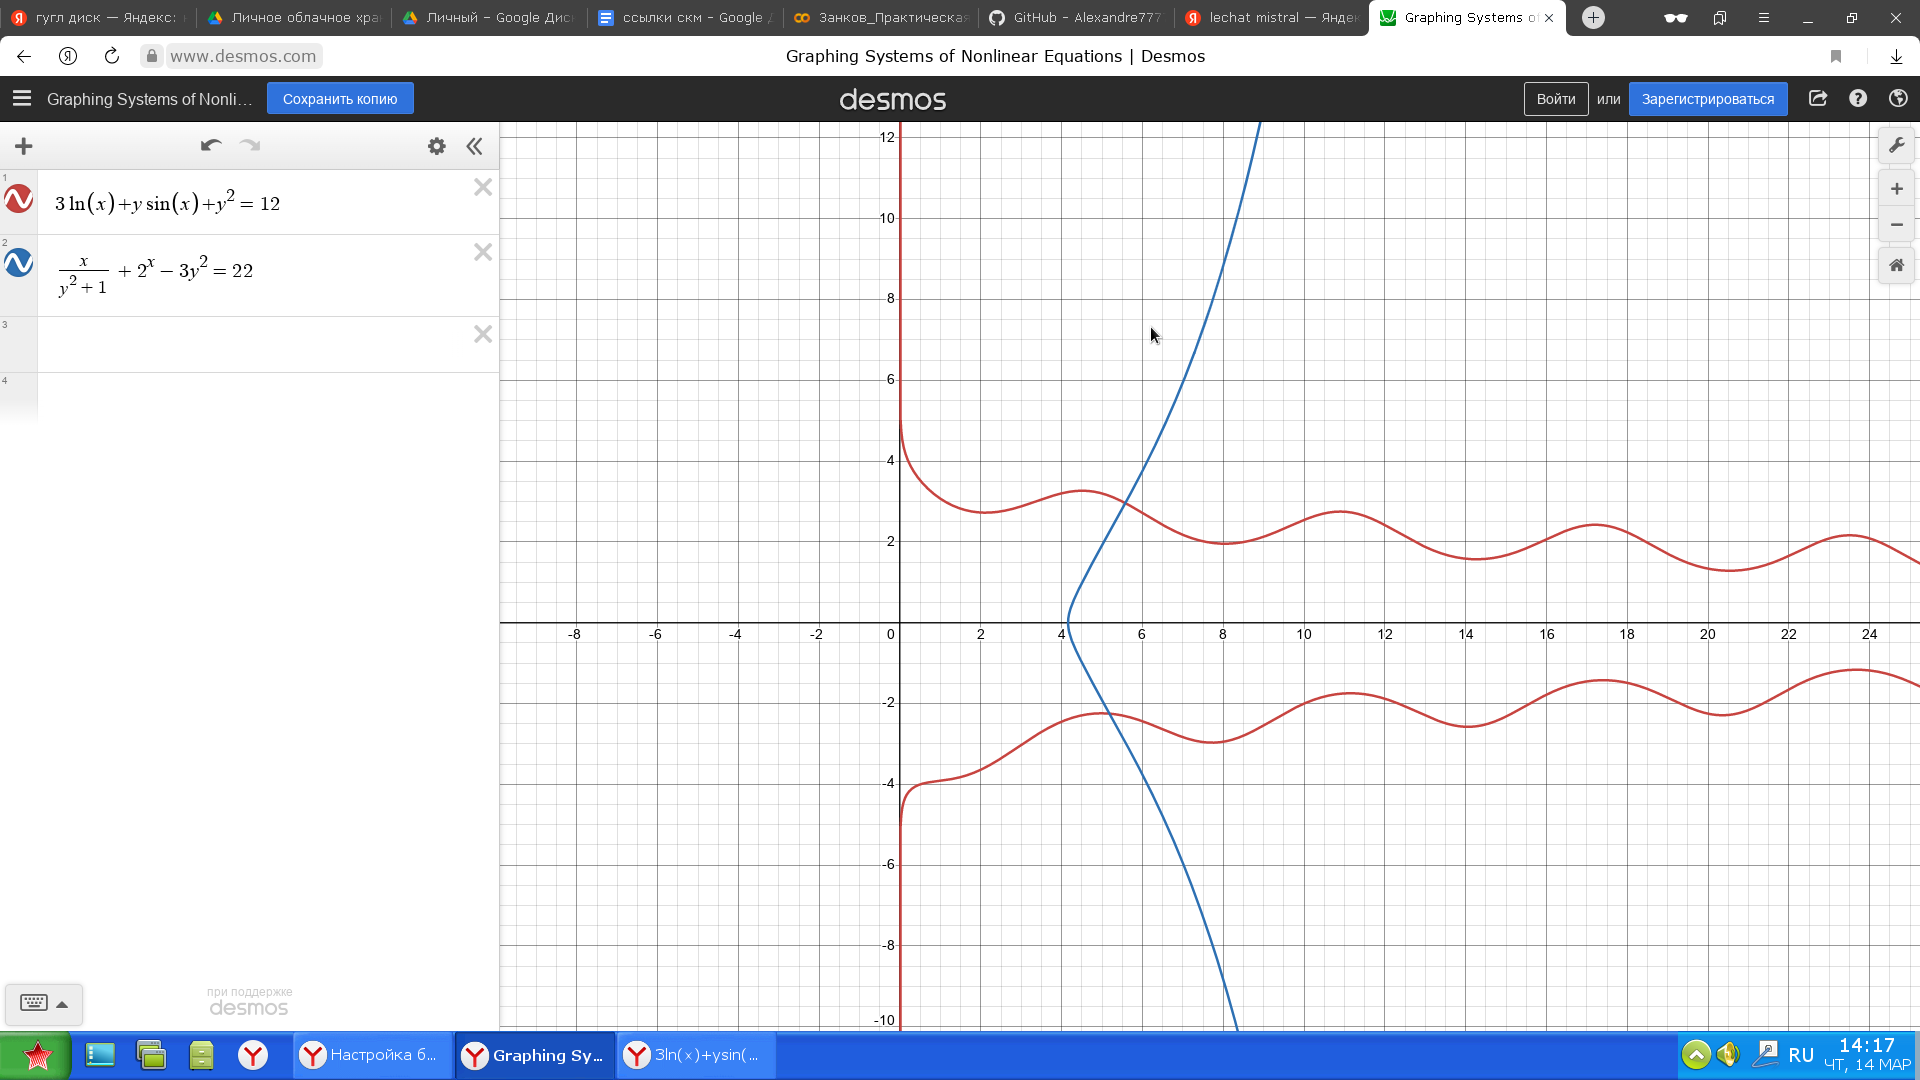

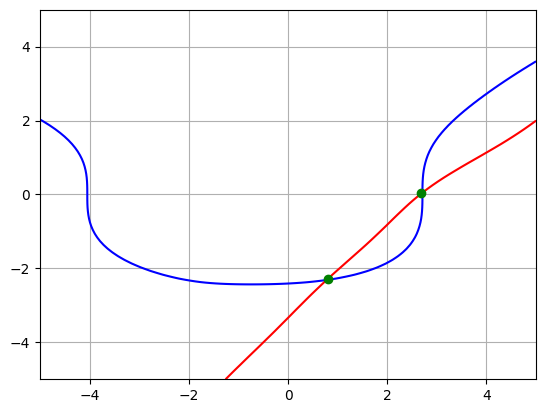

In [ ]:
def system_equations2(variables):
    x, y = variables
    eq1 = x**2 - y**3 + x/(np.sin(y) + 2) + 2**float(x) -15
    eq2 = x*(np.cos(y)**2) + np.exp(x-y) - y**2 - 17
    return [eq1, eq2]

initial_guess1 = [10, 10]
solution1 = fsolve(system_equations2, initial_guess1)

initial_guess2 = [0,-5]
solution2 = fsolve(system_equations2, initial_guess2)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z1 = X**2 - Y**3 + X/(np.sin(y) + 2) + 2**X -15
Z2 = X*(np.cos(Y)**2) + np.exp(X-Y) - Y**2 - 17

plt.contour(X, Y, Z1, [0], colors='blue')
plt.contour(X, Y, Z2, [0], colors='red')

plt.plot(solution1[0], solution1[1], 'go')
plt.plot(solution2[0], solution2[1], 'go')
plt.grid(True)
plt.show()

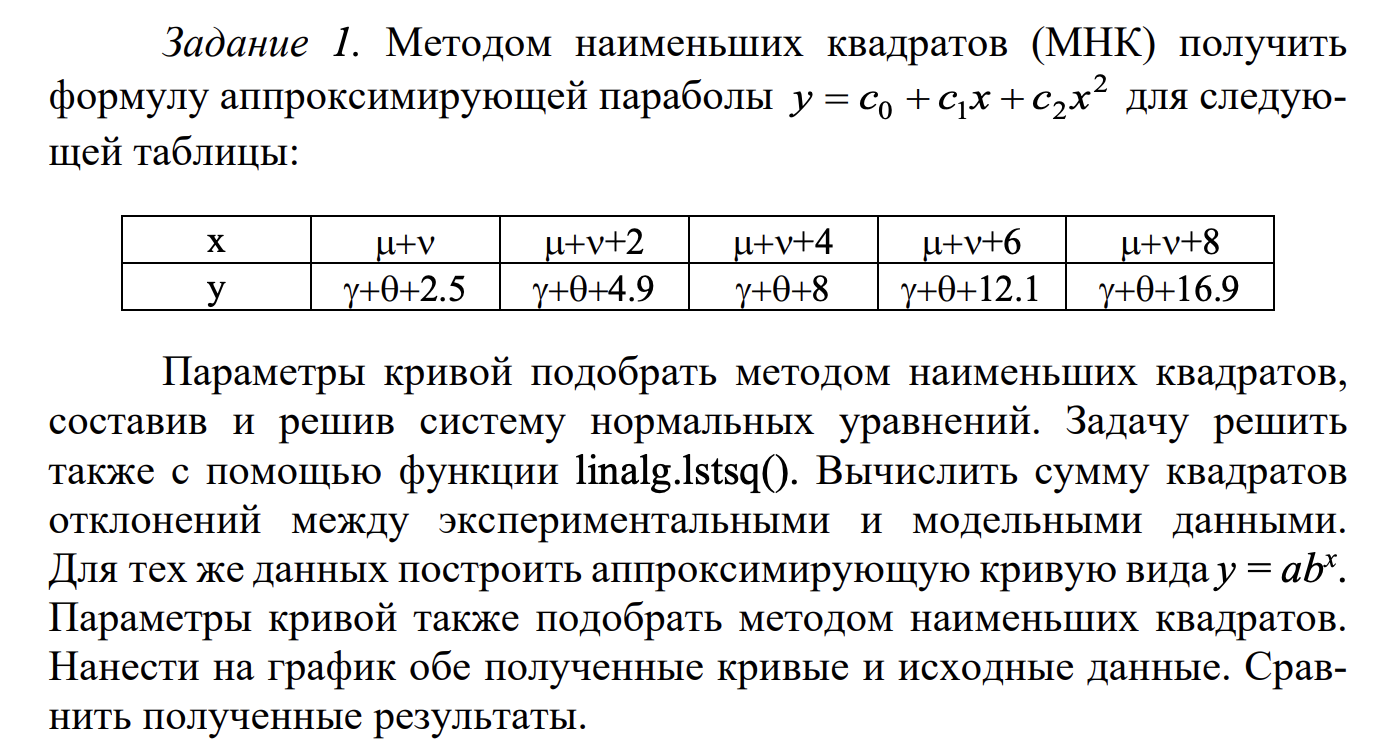

**Ход работы:**

1. **Определение переменных**: Определяем переменные $ \mu $, $ \nu $, и $ \gamma $, которые будут использоваться в наших уравнениях.

3. **Создание массивов данных**: Создаем два массива: `x_values` и `y_values`. `x_values` содержит значения $ x $, которые мы получаем, добавляя к $ \mu + \nu $ числа от 0 до 8 с шагом 2. `y_values` содержит соответствующие значения $ y $, которые мы также вычисляем, используя заданные значения $ \gamma $ и добавляя к нему разные числа.

4. **Подготовка матрицы коэффициентов**: Создаем матрицу `A`, которая будет использоваться для нахождения коэффициентов нашей параболы. Каждая строка матрицы `A` представляет собой значения $ 1 $, $ x $, и $ x^2 $ для каждого значения из `x_values`.

5. **Решение методом наименьших квадратов**: Функция `lstsq` принимает нашу матрицу `A` и массив `y_values`, и находит коэффициенты $ c_0 $, $ c_1 $, и $ c_2 $, которые минимизируют разницу между фактическими значениями $ y $ и значениями, предсказанными нашей параболой.

6. **Вывод результатов**: В конце мы выводим найденные коэффициенты и сумму квадратов отклонений, которая показывает, насколько хорошо наша парабола соответствует данным.

In [ ]:
from scipy import linalg

x_values = np.arange(2, 11, 2)
y_values = np.array([4.5, 6.9, 10, 14.1, 18.9])

len_x = len(x_values)

A = np.vstack([np.ones(len(x_values)), x_values, x_values**2]).T


c = linalg.lstsq(A, y_values)[0]
print("Коэффициенты параболы:")
print(f"c0 = {c[0]}")
print(f"c1 = {c[1]}")
print(f"c2 = {c[2]}")

y_predicted = c[0] + c[1] * x_values + c[2] * x_values**2
s = np.sum((y_values - y_predicted)**2)
print(f"Сумма квадратов отклонений: {s}")


Коэффициенты параболы:
c0 = 2.9799999999999875
c1 = 0.557142857142857
c2 = 0.10357142857142865
Сумма квадратов отклонений: 0.0051428571428571365


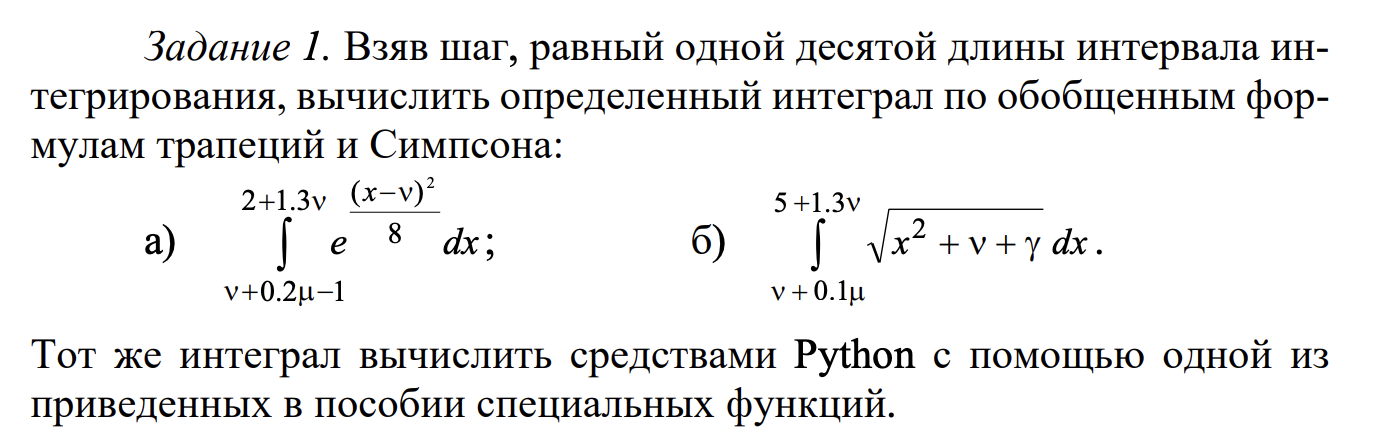

In [ ]:
from scipy.integrate import simpson, trapz
import numpy as np


def function_ex1(x, v=1):
  return np.exp(((x-v)**2)/8)

def ex1_func2(x, v=1, g=1):
  return np.sqrt(x**2+v+g)


def integral1(vi=1, mu=1):
  x1 = np.linspace(vi+0.2*mu-1, 2+1.3*vi, num=500)
  y1 = function_ex1(x1, v=vi)
  sims_res1 = simpson(y1, x1)
  trapz_res1 = trapz(y1, x1)
  print('Первый интеграл')
  print(f'Метод Симпсона: {sims_res1}')
  print(f'Метод трапеций: {trapz_res1}')

def integral2(vi=1, mu=1, gamma=1):
  x1 = np.linspace(vi+0.1*mu, 5+1.3*vi, num=500)
  y1 = ex1_func2(x1, v=vi, g=gamma)
  sims_res1 = simpson(y1, x1)
  trapz_res1 = trapz(y1, x1)
  print('Первый интеграл')
  print(f'Метод Симпсона: {sims_res1}')
  print(f'Метод трапеций: {trapz_res1}')


integral1()
integral2()


Первый интеграл
Метод Симпсона: 3.7474933307672296
Метод трапеций: 3.7474976099886192
Первый интеграл
Метод Симпсона: 20.837685560058475
Метод трапеций: 20.837688833763018


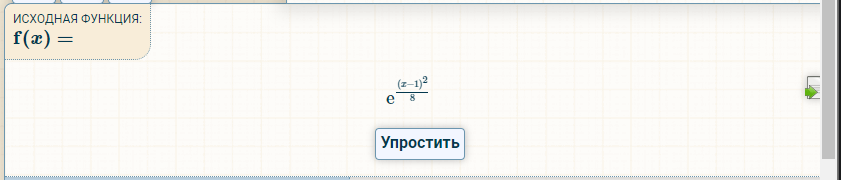
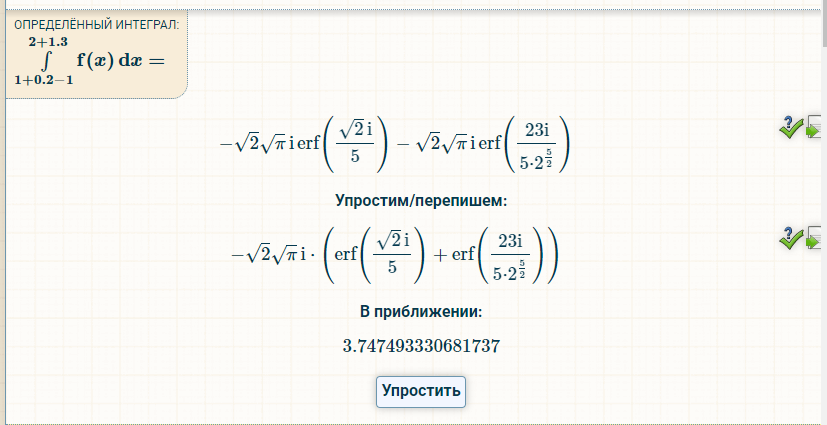

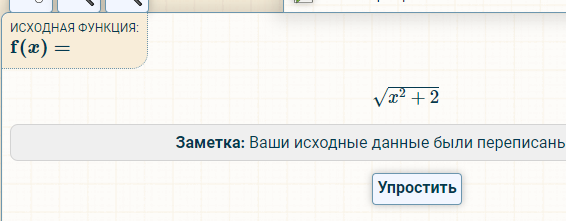
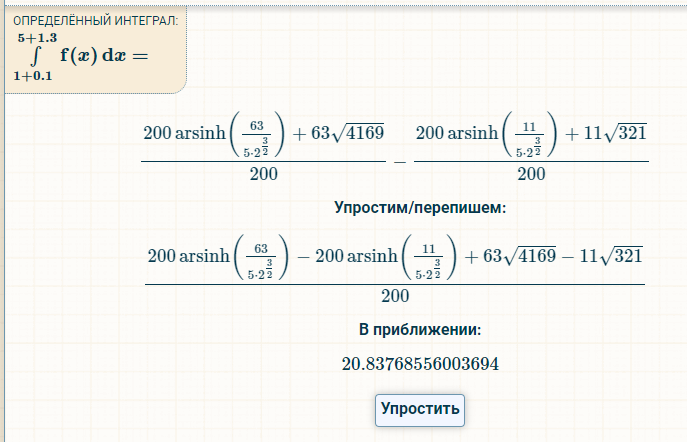

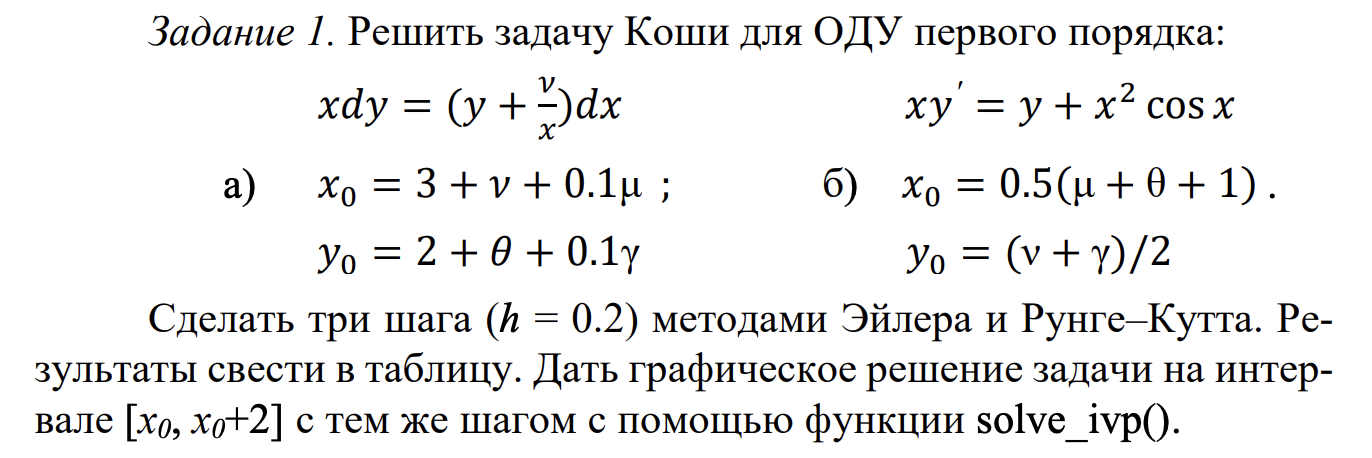

Метод Эйлера:
x          y
4.1000     3.1000    
4.3000     3.7688    
4.5000     4.5690    
4.7000     5.5273    

Метод Рунге-Кутты:
x          y
4.1000     3.1000    
4.3000     3.8391    
4.5000     4.7394    
4.7000     5.8369    


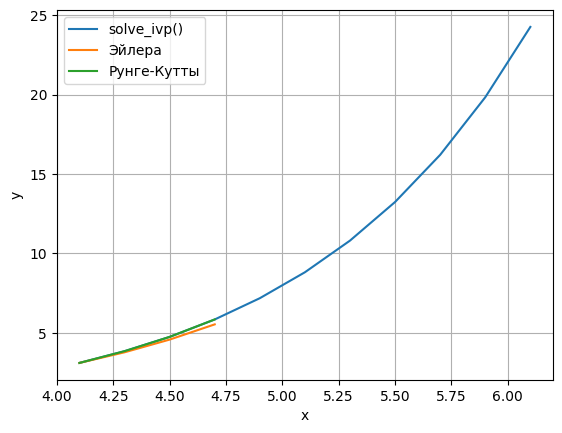

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def koshi(model, v=1, mu=1, fi=1, gamma=1, choice=None):
  if choice:
    x0=0.5*(mu+fi+1)
    y0 = (v+gamma)/2
  else:
    x0 = 3+v+0.1*mu
    y0 = 2+fi+0.1*gamma



  h = 0.2
  # Эйлер
  # y[i+1] = y[i] + h * f(x,y)
  x_euler = [x0]
  y_euler = [y0]

  for i in range(3):
      y_new = y_euler[-1] + h * model(x_euler[-1], y_euler[-1], vi=v)
      x_euler.append(x_euler[-1] + h)
      y_euler.append(y_new)


  x_rk = [x0]
  y_rk = [y0]

  # Рунге-Кутта
  def rk4_step(x, y, h, model):
      k1 = h * model(x, y)
      k2 = h * model(x + h / 2, y + k1 / 2)
      k3 = h * model(x + h / 2, y + k2 / 2)
      k4 = h * model(x + h, y + k3)
      return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6



  for i in range(3):
      y_new = rk4_step(x_rk[-1], y_rk[-1], h, model)
      x_rk.append(x_rk[-1] + h)
      y_rk.append(y_new)


  x_range = np.linspace(x0, x0 + 2, 11)
  sol = solve_ivp(model, [x0, x0 + 2], [y0], t_eval=x_range)

  print("Метод Эйлера:")
  print("x          y")
  for x, y in zip(x_euler, y_euler):
      print(f"{x:<10.4f} {y:<10.4f}")

  print("\nМетод Рунге-Кутты:")
  print("x          y")
  for x, y in zip(x_rk, y_rk):
      print(f"{x:<10.4f} {y:<10.4f}")


  plt.plot(x_range, sol.y[0], label="solve_ivp()")
  plt.plot(x_euler, y_euler, label="Эйлера")
  plt.plot(x_rk, y_rk, label="Рунге-Кутты")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid()
  plt.show()


def model(x, y, vi=1):
    dy_dx = (y + vi / x)
    return dy_dx




koshi(model)

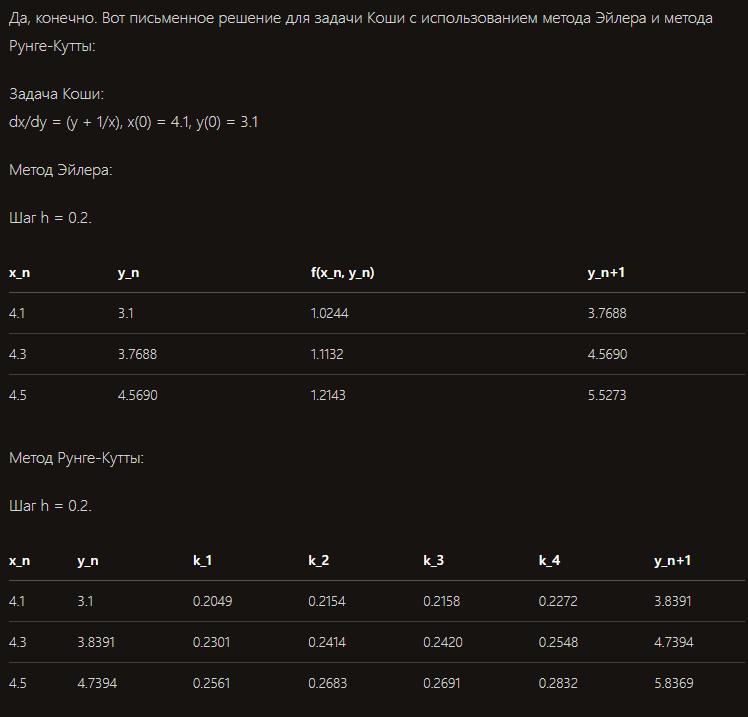

Метод Эйлера:
x          y
1.5000     1.0000    
1.7000     1.2318    
1.9000     1.4037    
2.1000     1.4511    

Метод Рунге-Кутты:
x          y
1.5000     1.0000    
1.7000     1.2045    
1.9000     1.3086    
2.1000     1.2313    


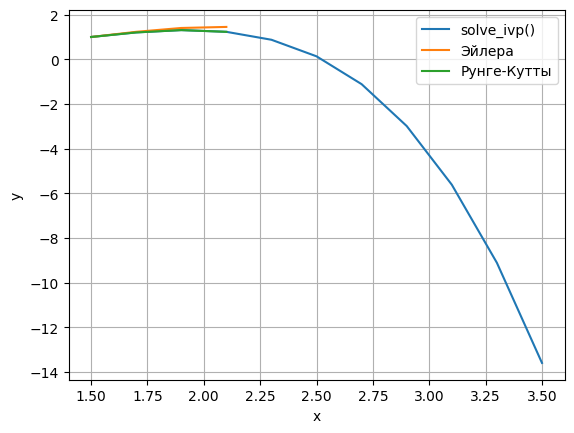

In [4]:
def model1(x, y, vi=1):
    return y + (x**2) * np.cos(x)


koshi(model1, choice=1)

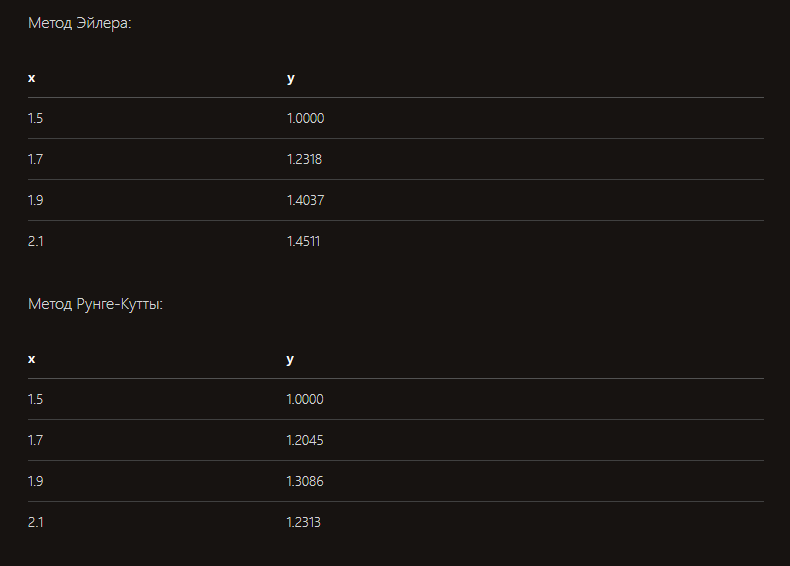
